In [14]:
from numpy import *
%run integradores.ipynb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Las funciones programadas en el noteboook _integradores_, ya tienen la capacidad de aceptar párametros como se requiere para este problema; a través de _key word arguments_ (o _kwargs_), los integradores pueden pasarle todos los parámetros extras que la ecuación diferencial requiera.


En este problema, utilizaremos esta funcionalidad para explorar el comportamiento de las soluciones a la siguiente ecuación diferencial, en función de su parámetro $\omega$

$$
\ddot x  + 0.1\dot x + 4\sin x = 0.5\sin(\omega t)
$$

Reordenando y haciendo un cambio de variable, tenemos dos ecuaciones de primer orden:

$$
\begin{array}\\
\dot x &=& y\\ \dot y &=& -0.1y - 4\sin (x) + 0.5\sin (\omega t)
\end{array}
$$

De manera que la parcial y el Jacobiano son:

$$
\begin{array}\\
\partial f/ \partial t &=& ( 0, 0.5w\cos (\omega t) ) \\
J(x,y) &=& \begin{pmatrix} 0 & 1 \\ -4cos(x) & -0.1 \end{pmatrix}
\end{array}
$$

In [10]:
inicial = array([0,1])
dominio = [0,50]
W = arange(1,3+0.1,0.1,)

def ecuacion(x,t,w=1.0):
    y = x[1]
    y_dot = -0.1*y - 4*sin(x[0]) + 0.5*sin(w*t)
    return array([y,y_dot])
def D_ecuacion(x,t,w=1.0):
    par = array([0,0.5*w*cos(w*t)])
    jac = array([ [0, 1], [-4*cos(x[0]), -0.1] ])
    return par,jac

In [13]:
integradores = ["Euler","Taylor, O2","Runge-Kutta, O1","Runge-Kutta, O2"]
soluciones = {w:[] for w in W} 
h = 0.01
# Calcular las soluciones, con cada integrador, para los distintos pasos
for w in W:
    soluciones[w].append( int_euler(ecuacion,inicial,dominio,h=h,w=w) )
    soluciones[w].append( int_ty2(ecuacion,D_ecuacion,inicial,dominio,h=h,w=w) )
    soluciones[w].append( int_rk2(ecuacion,inicial,dominio,h=h,w=w) )
    soluciones[w].append( int_rk4(ecuacion,inicial,dominio,h=h,w=w) )

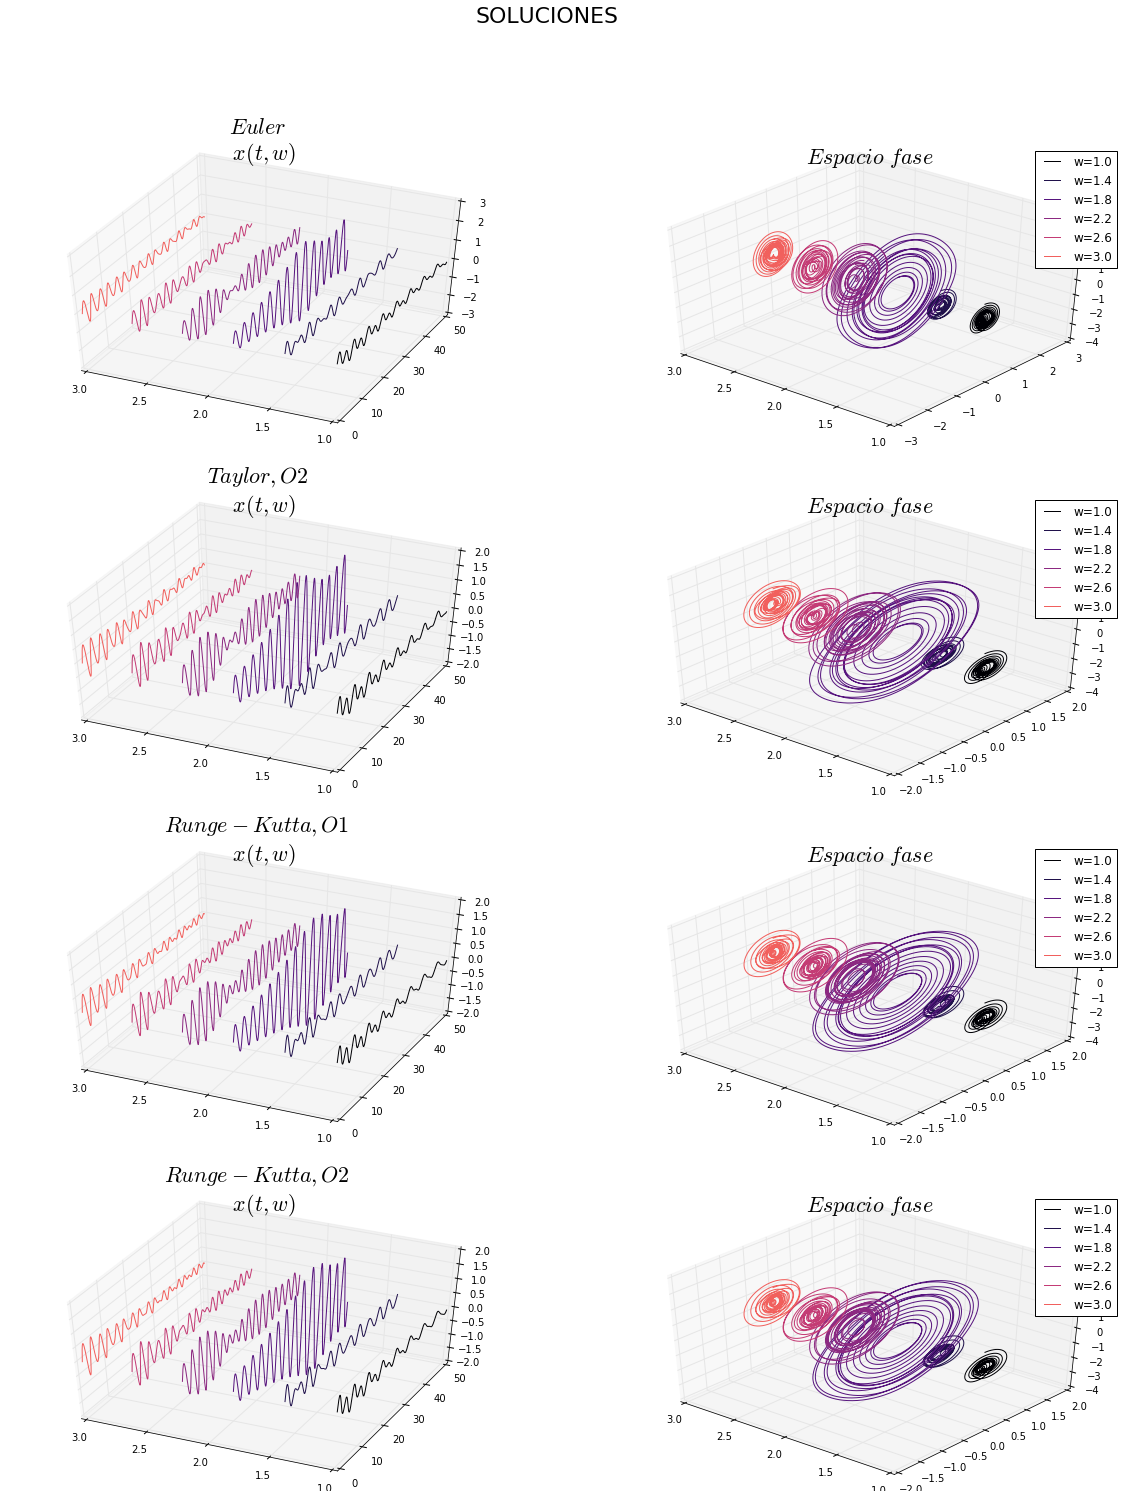

In [84]:
fig = plt.figure(figsize=(20,24))
fig.suptitle("SOLUCIONES",fontsize=22)
from matplotlib import cm
x = cm.ScalarMappable(cmap="magma").to_rgba(range(len(W)+10))
for i in xrange(2,4*2+2,2):
    ax1 = fig.add_subplot(4,2,i-1,projection="3d")
    ax1.set_title("${}\ $ \n $x(t,w)$".format(integradores[i/2-1]),fontsize=22)
    ax2 = fig.add_subplot(4,2,i,projection="3d")
    ax2.set_title("$Espacio\ fase\ $",fontsize=22)
    for w in W[::4]:
        t,sol = soluciones[w][i/2-1]
        w_arr = array([w]*len(t))
        ax1.plot(w_arr,t,sol[:,0],c=x[list(W).index(w)])
        ax2.plot(w_arr,sol[:,0],sol[:,1],c=x[list(W).index(w)],label="w={}".format(w))
        ax1.set_xlim(3,1),ax2.set_xlim(3,1)
        ax1.view_init(elev=45., azim=295.)
        ax2.view_init(elev=40., azim=310.)
        ax2.legend()
plt.show()

Ahora, para explorar con mas detalle la aparición de la resonancia, graficarémos las soluciones para todas las $w\in\{1.0,1.1,1.2,...,2.9,3.0\}$, en el espacio fase.

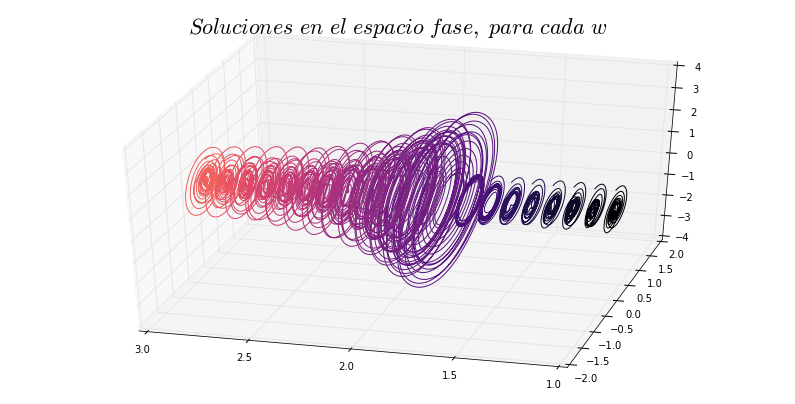

In [77]:
fig = plt.figure(figsize=(14,7))
from matplotlib import cm
x = cm.ScalarMappable(cmap="magma").to_rgba(range(len(W)+10))
ax2 = fig.add_subplot(1,1,1,projection="3d")
ax2.set_title(u"$Soluciones\ en\ el\ espacio\ fase,\ para\ cada\ w$",fontsize=22)
for w in W:
    t,sol = soluciones[w][3]
    w_arr = array([w]*len(t))
    ax2.plot(w_arr,sol[:,0],sol[:,1],c=x[list(W).index(w)])
ax2.set_xlim(3,1)
ax2.view_init(elev=35., azim=285.)
plt.show()